**Lukman Abdiansyah - Facies Classification**

##**Data Loading & Import Library**

In [1]:
import numpy as np 
import pandas as pd

import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio

import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Facies.csv')
df

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


##**Variable Description**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Well Name  3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


In [4]:
df.isna().sum()

Facies       0
Formation    0
Well Name    0
Depth        0
GR           0
ILD_log10    0
DeltaPHI     0
PHIND        0
PE           0
NM_M         0
RELPOS       0
dtype: int64

In [5]:
df['Well Name'] = df['Well Name'].astype('category')
df['Formation'] = df['Formation'].astype('category')
df['Well Name'].unique()

['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (8, object): ['CHURCHMAN BIBLE', 'CROSS H CATTLE', 'LUKE G U', 'NEWBY', 'NOLAN', 'Recruit F9',
                         'SHANKLE', 'SHRIMPLIN']

In [6]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#pemberian warna untuk setiap fasies jika data log diplot untuk setiap kedalaman
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
df.loc[:,'FaciesLabels'] = df.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [7]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


##**Univariate Analysis**

                 jumlah sampel  persentase
CROSS H CATTLE             501        15.5
SHRIMPLIN                  471        14.6
NEWBY                      463        14.3
LUKE G U                   461        14.3
SHANKLE                    449        13.9
NOLAN                      415        12.8
CHURCHMAN BIBLE            404        12.5
Recruit F9                  68         2.1


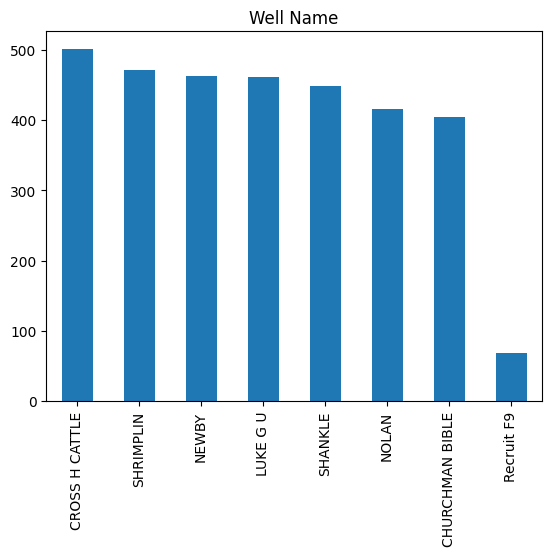

In [8]:
feature = 'Well Name'
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
2            738        22.8
3            615        19.0
8            498        15.4
6            462        14.3
1            259         8.0
5            217         6.7
4            184         5.7
9            161         5.0
7             98         3.0


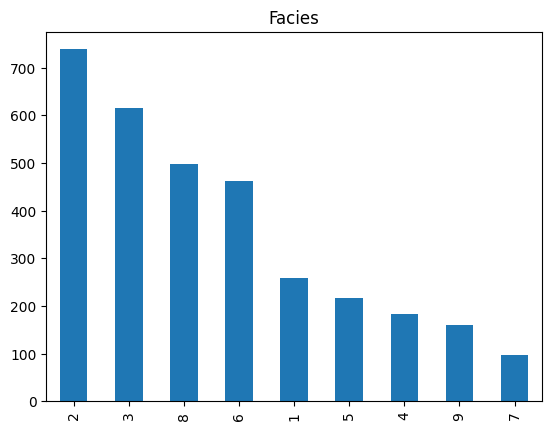

In [9]:
feature = 'Facies'
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

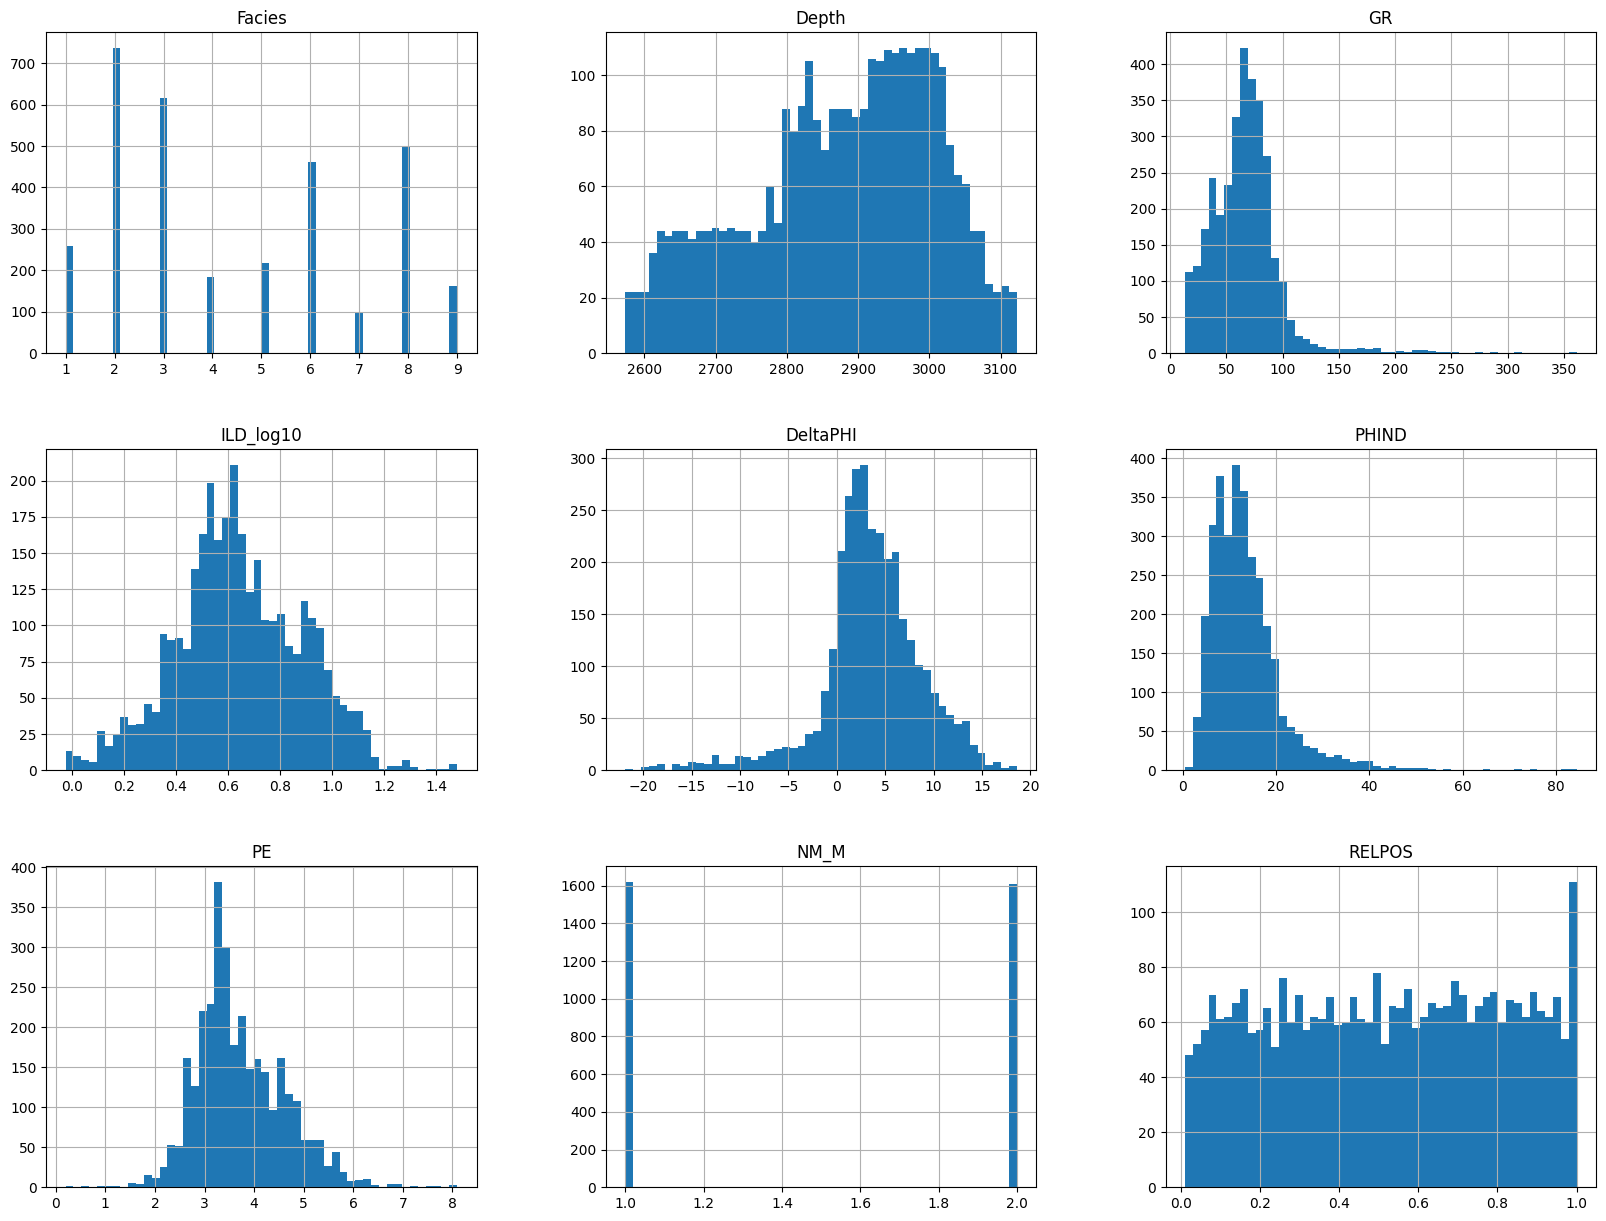

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

##**Well Log Data Visualization**

In [8]:
#Data log dari sumur NEWBY digunakan sebagai data pengujian
blind_testing_data = df[df['Well Name'] == 'NEWBY']
df = df[df['Well Name'] != 'NEWBY']

In [10]:
df.shape

(2769, 12)

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
#fungsi untuk memvisualisasikan data log untuk setiap sumur
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.40')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

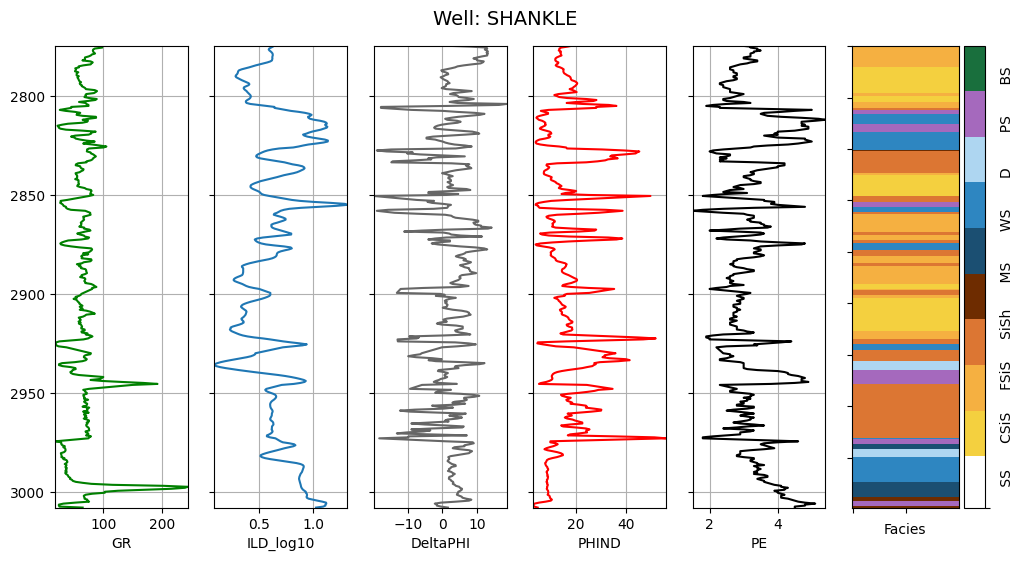

In [11]:
make_facies_log_plot(
    df[df['Well Name'] == 'SHANKLE'],
    facies_colors)

##**Multivariate Analysis**

<ipython-input-14-019cb2396907>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


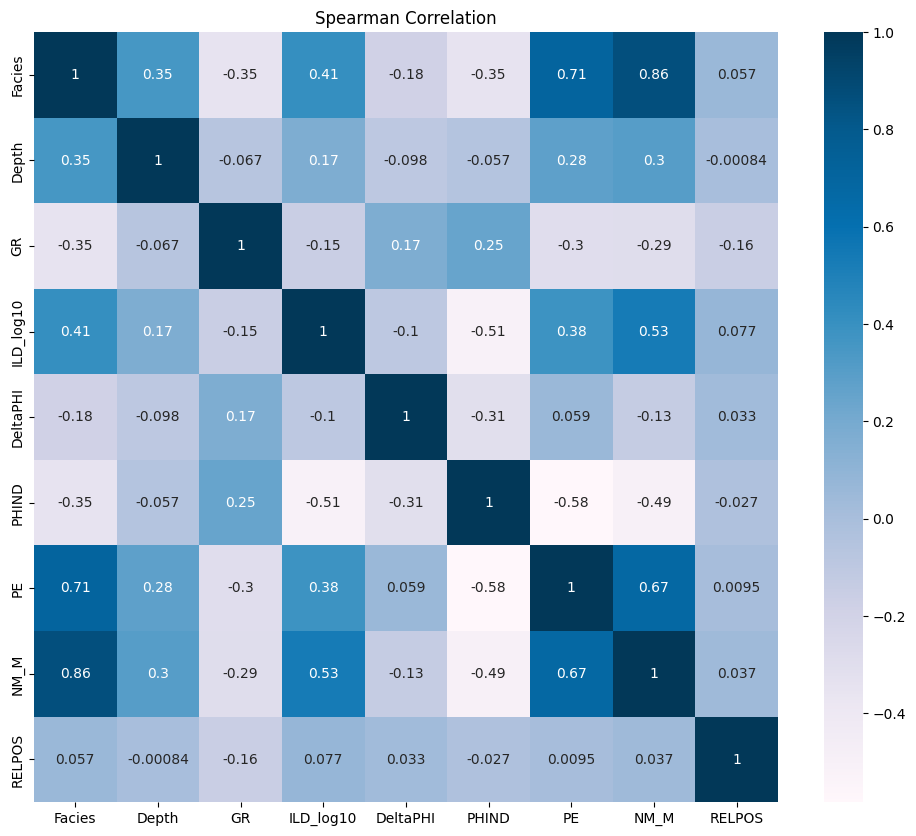

In [14]:
#Heatmap Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.title('Spearman Correlation')
plt.show()

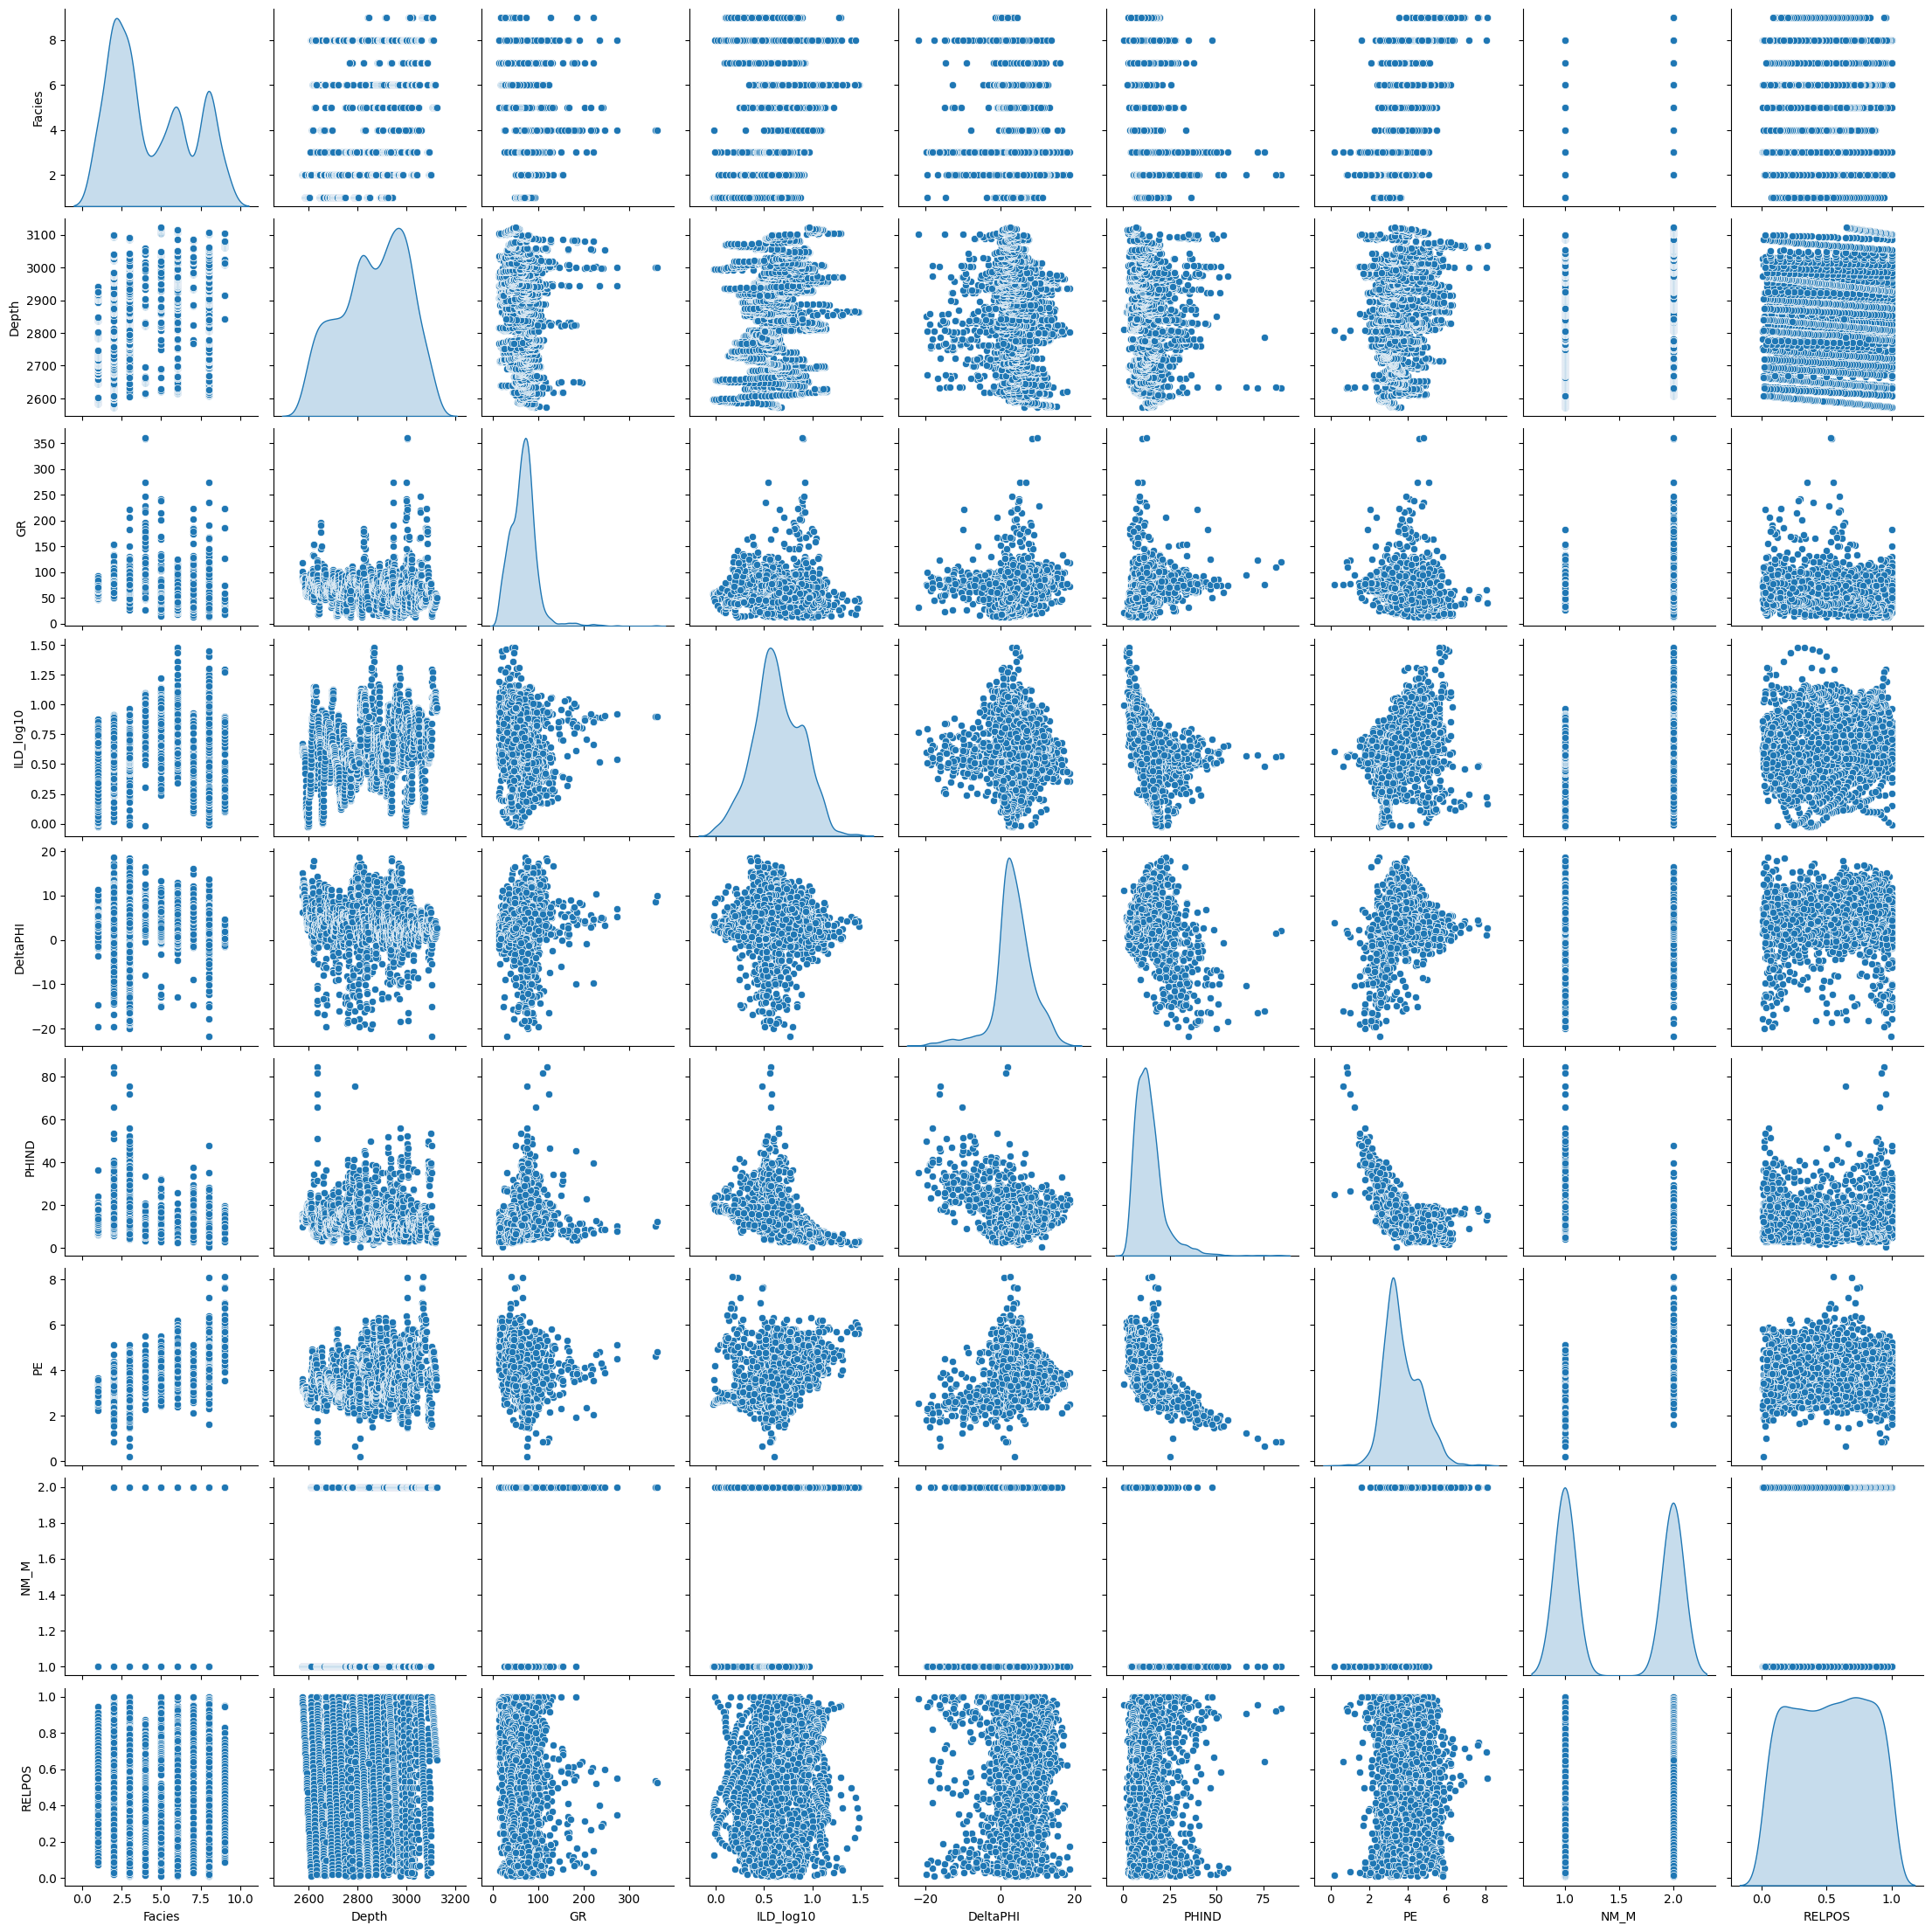

In [49]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

##**Data Preparation**

In [12]:
y = df['Facies'].values
X = df.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# standarisasi nilai-nilai dari feature
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2215, 7)
(554, 7)
(2215,)
(554,)


In [14]:
y1 = blind_testing_data['Facies'].values
X1 = blind_testing_data.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)
# standarisasi nilai-nilai dari blind data testing
scaler1 = StandardScaler()
scaler1.fit(X1)
X1 = scaler1.transform(X1)

##**Preliminary Model Development**

In [15]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, random_state=123)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:11<00:00,  2.56it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.74,0.74,None,0.74,0.36
LabelSpreading,0.72,0.74,None,0.72,0.44
LabelPropagation,0.71,0.73,None,0.71,0.25
RandomForestClassifier,0.72,0.72,None,0.72,0.59
BaggingClassifier,0.69,0.69,None,0.69,0.20
LGBMClassifier,0.71,0.68,None,0.71,5.28
KNeighborsClassifier,0.64,0.64,None,0.64,0.03
DecisionTreeClassifier,0.62,0.62,None,0.62,0.03
ExtraTreeClassifier,0.61,0.61,None,0.61,0.01


## **Random Forest Classifier**

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# latih model dengan fungsi fit
RF = RandomForestClassifier(random_state=123)
RF.fit(X_train,y_train)

# uji akurasi model
ypred = RF.predict(X_test)

print('Accuracy:',round(accuracy_score(ypred, y_test),3))

Accuracy: 0.72


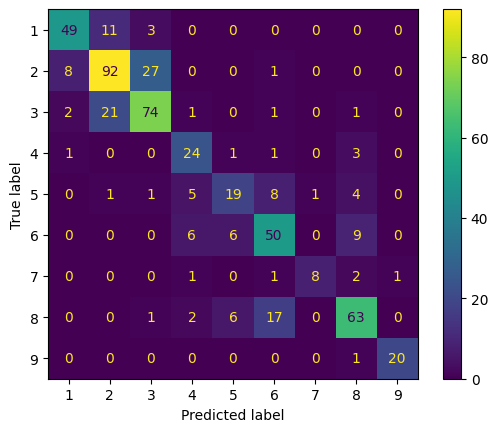

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(RF, X_test, y_test)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           1       0.82      0.78      0.80        63
           2       0.74      0.72      0.73       128
           3       0.70      0.74      0.72       100
           4       0.62      0.80      0.70        30
           5       0.59      0.49      0.54        39
           6       0.63      0.70      0.67        71
           7       0.89      0.62      0.73        13
           8       0.76      0.71      0.73        89
           9       0.95      0.95      0.95        21

    accuracy                           0.72       554
   macro avg       0.74      0.72      0.73       554
weighted avg       0.72      0.72      0.72       554



In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
RF = RandomForestClassifier(random_state=123)
CV_RF = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5)
CV_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [22]:
CV_RF.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 400}

In [65]:
RF=RandomForestClassifier(random_state=123, max_features='auto', n_estimators= 400, max_depth=8, criterion='entropy')

In [66]:
# latih model dengan fungsi fit
RF.fit(X_train,y_train)

# uji akurasi model
ypred = RF.predict(X_test)

print('Accuracy:',round(accuracy_score(ypred, y_test),3))

Accuracy: 0.668


## **Extra Trees Classifier**

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(random_state=123)
ETC.fit(X_train,y_train)
y_pred=ETC.predict(X_test)
print('Accuracy:',round(accuracy_score(y_pred, y_test),3))

Accuracy: 0.738


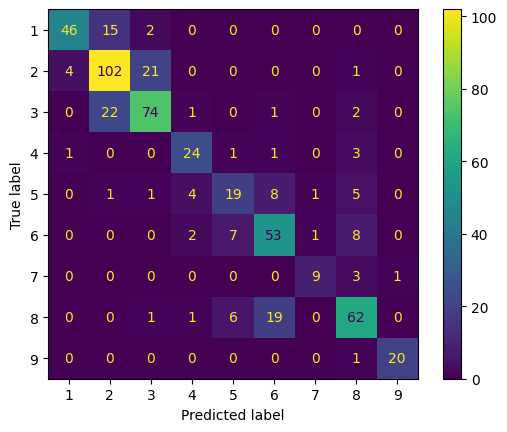

In [24]:
ConfusionMatrixDisplay.from_estimator(ETC, X_test, y_test)

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.73      0.81        63
           2       0.73      0.80      0.76       128
           3       0.75      0.74      0.74       100
           4       0.75      0.80      0.77        30
           5       0.58      0.49      0.53        39
           6       0.65      0.75      0.69        71
           7       0.82      0.69      0.75        13
           8       0.73      0.70      0.71        89
           9       0.95      0.95      0.95        21

    accuracy                           0.74       554
   macro avg       0.76      0.74      0.75       554
weighted avg       0.74      0.74      0.74       554



In [46]:
param_grid1 = { 
    'n_estimators': [10,50,100,300,500,1000],
    'max_features': ['auto', 'sqrt', 'log2',None],
    'max_depth' : [2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy', 'log_loss']
}
ETC = ExtraTreesClassifier(random_state=123)
CV_ETC = GridSearchCV(estimator=ETC, param_grid=param_grid1, cv= 5)
CV_ETC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [10, 50, 100, 300, 500, 1000]})

In [47]:
CV_ETC.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'n_estimators': 500}

In [63]:
ETC = ExtraTreesClassifier(n_estimators=500,criterion='entropy',max_depth=8,random_state=123)
ETC.fit(X_train,y_train)
y_pred=ETC.predict(X_test)
print('Accuracy:',round(accuracy_score(y_pred, y_test),3))

Accuracy: 0.608


## **Label Spreading**

In [28]:
from sklearn.semi_supervised import LabelSpreading
LS = LabelSpreading()
LS.fit(X_train,y_train)
y__pred=ETC.predict(X_test)
print('Accuracy:',round(accuracy_score(y__pred, y_test),3))

Accuracy: 0.738


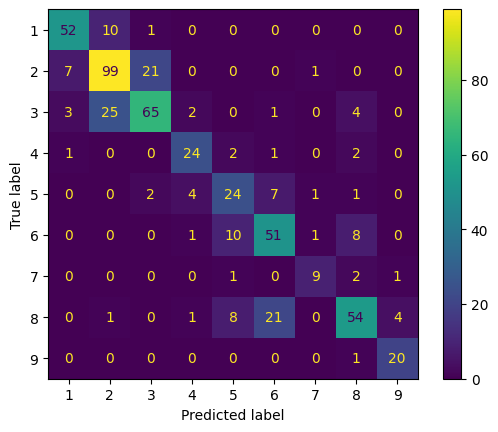

In [27]:
ConfusionMatrixDisplay.from_estimator(LS, X_test, y_test)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y__pred))

              precision    recall  f1-score   support

           1       0.90      0.73      0.81        63
           2       0.73      0.80      0.76       128
           3       0.75      0.74      0.74       100
           4       0.75      0.80      0.77        30
           5       0.58      0.49      0.53        39
           6       0.65      0.75      0.69        71
           7       0.82      0.69      0.75        13
           8       0.73      0.70      0.71        89
           9       0.95      0.95      0.95        21

    accuracy                           0.74       554
   macro avg       0.76      0.74      0.75       554
weighted avg       0.74      0.74      0.74       554



## **Label Propagation**

In [29]:
from sklearn.semi_supervised import LabelPropagation
LP = LabelPropagation()
LP.fit(X_train,y_train)
y___pred=LP.predict(X_test)
print('Accuracy:',round(accuracy_score(y___pred, y_test),3))

Accuracy: 0.709


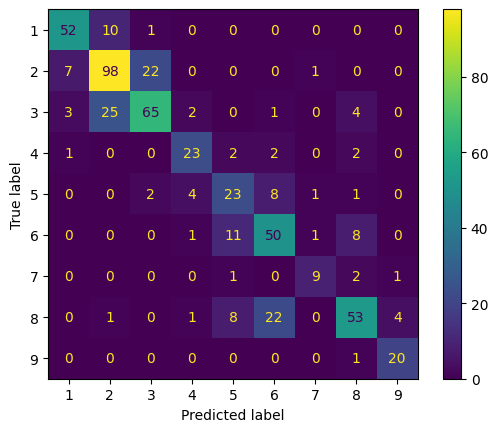

In [30]:
ConfusionMatrixDisplay.from_estimator(LP, X_test, y_test)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y___pred))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        63
           2       0.73      0.77      0.75       128
           3       0.72      0.65      0.68       100
           4       0.74      0.77      0.75        30
           5       0.51      0.59      0.55        39
           6       0.60      0.70      0.65        71
           7       0.75      0.69      0.72        13
           8       0.75      0.60      0.66        89
           9       0.80      0.95      0.87        21

    accuracy                           0.71       554
   macro avg       0.71      0.73      0.72       554
weighted avg       0.71      0.71      0.71       554



## **Applying Model Untuk Blind Data**

In [67]:
from sklearn.metrics import f1_score
blind = pd.DataFrame()
#RF
yhat_blind_RF = RF.predict(X1)
blind['RF_Pred'] = yhat_blind_RF
accRF_b = round(accuracy_score(yhat_blind_RF, y1),3)
f1RF_b = f1_score(y1, yhat_blind_RF, average='weighted')

#ETC
yhat_blind_ETC = ETC.predict(X1)
blind['ETC_Pred'] = yhat_blind_ETC
accETC_b = round(accuracy_score(yhat_blind_ETC, y1),3)
f1ETC_b = f1_score(y1, yhat_blind_ETC, average='weighted')

#LS
yhat_blind_LS = LS.predict(X1)
blind['LS_Pred'] = yhat_blind_LS
accLS_b = round(accuracy_score(yhat_blind_LS, y1),3)
f1LS_b = f1_score(y1, yhat_blind_LS, average='weighted')

#LP
yhat_blind_LP = LP.predict(X1)
blind['LP_Pred'] = yhat_blind_LP
accLP_b = round(accuracy_score(yhat_blind_LP, y1),3)
f1LP_b = f1_score(y1, yhat_blind_LP, average='weighted')

In [68]:
data_frame1 ={'Model type': ['Random Forest', 'ExtraTreesClassifier', 'LabelSpreading', 'LabelPropagation'],
       'Acuracy': [accRF_b, accETC_b, accLS_b, accLP_b],
       'F-1 Score':[f1RF_b,f1ETC_b,f1LS_b,f1LP_b]}
df2 = pd.DataFrame(data_frame1)

**Sebelum Hyperparameter Tuning**




In [62]:
df2

,Model type,Acuracy,F-1 Score
0,Random Forest,0.48,0.49
1,ExtraTreesClassifier,0.51,0.51
2,LabelSpreading,0.46,0.48
3,LabelPropagation,0.46,0.47


**Setelah Hyperparameter Tuning**

In [69]:
df2

,Model type,Acuracy,F-1 Score
0,Random Forest,0.53,0.53
1,ExtraTreesClassifier,0.52,0.50
2,LabelSpreading,0.46,0.48
3,LabelPropagation,0.46,0.47
